<a href="https://colab.research.google.com/github/LiamJHowarth/Financial_Analytics/blob/main/Bond_Pricing_System_An_Architects_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bond Pricing System**: A Take on Martin Fowlers EIP

## How would we create a messaging system?

As analysts, it is important we understand our domain and the components that make up the flow of activities and information that a enterprise does business in. In Domain Driven Design, we can reference these high level **classes** which give us a hierachy of bounded context to play with.

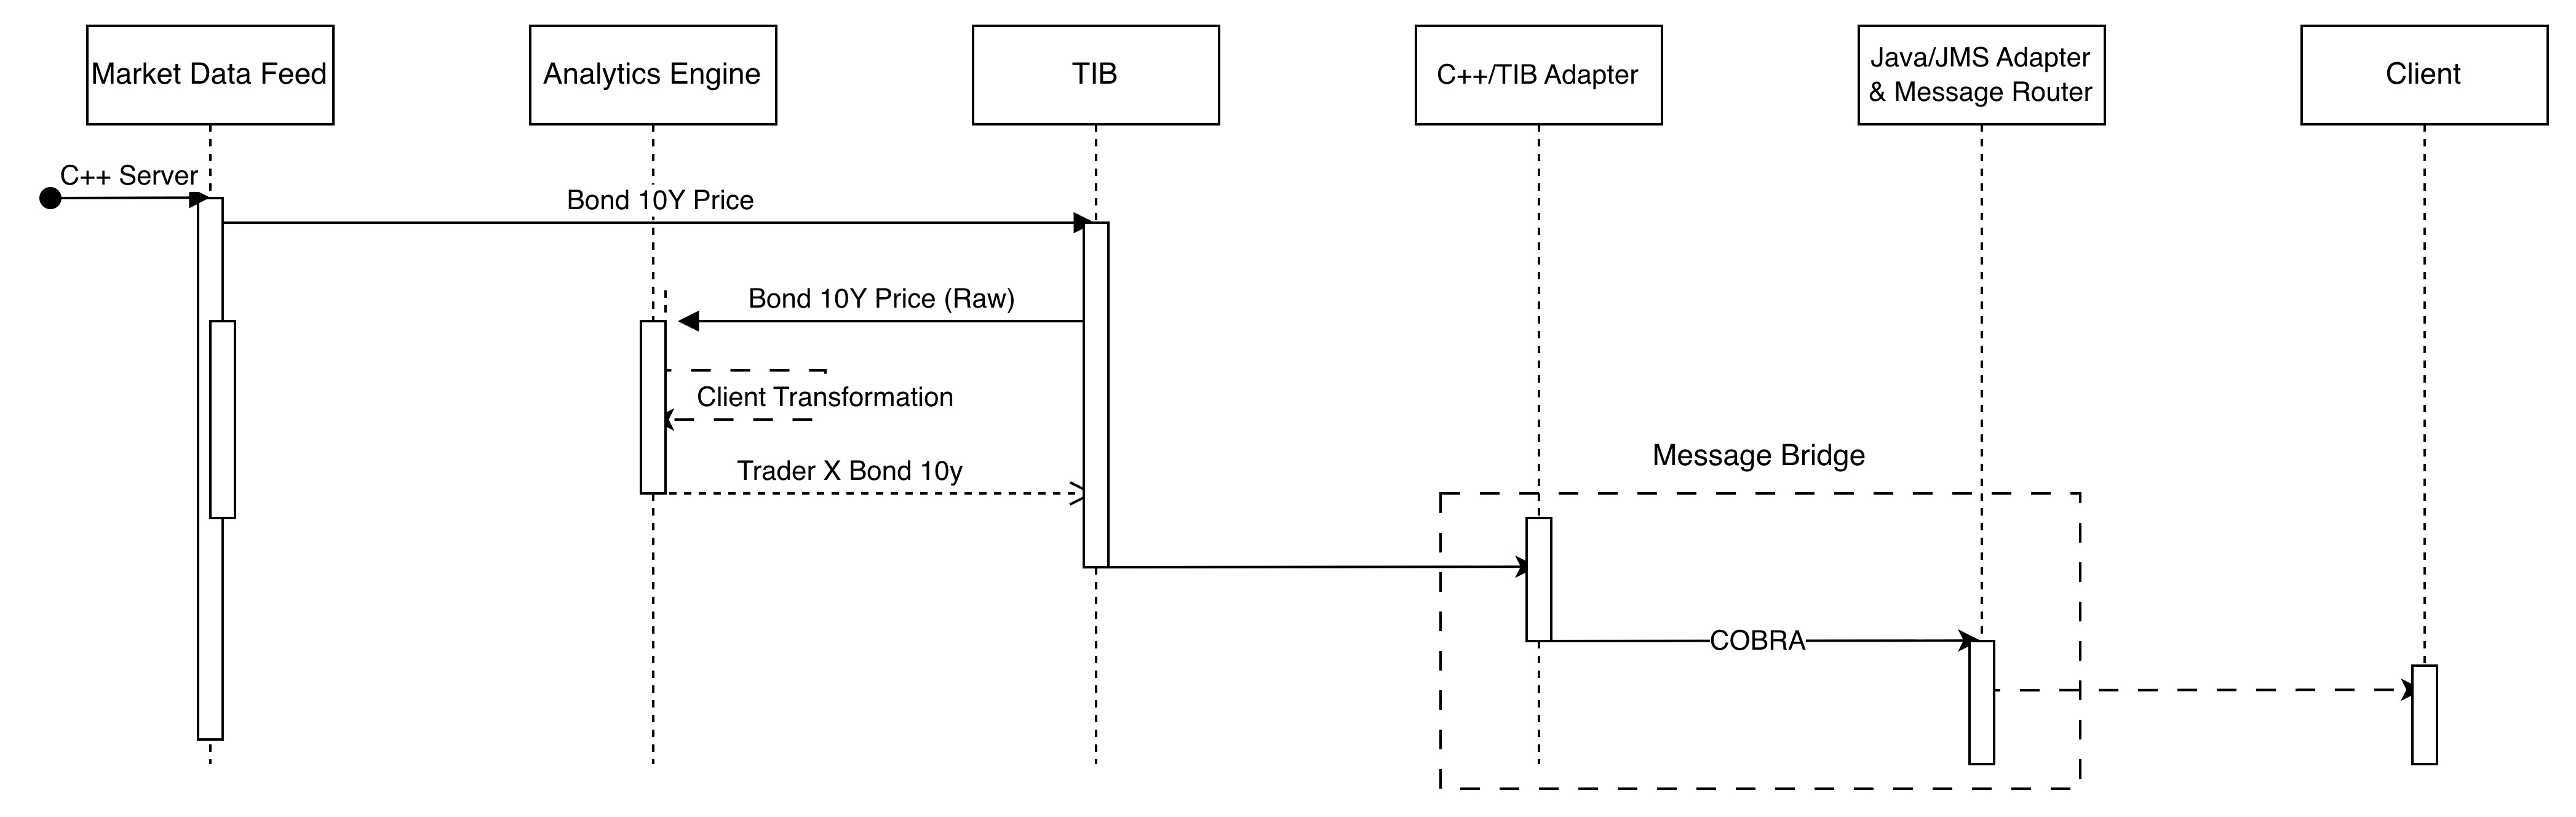

Abstracting the components in the system will allow the analyst to discover the critical middleware which processes the incoming and outgoing data. The component in this instance is the TIB Information Bus. The TIB is a messaging infrastructure that will allow the raw data to be ingested and then sent into the subscriber component (Analytics Engine).

Decoupling: Each component doesn't need to know the intricate details of the others. For example:

The C++ server just needs to send its raw data (or requests) to the JMS Service; it doesn't care about how pricing is calculated or where the data ultimately goes for analytics.
The JMS Service just ensures reliable message delivery; it doesn't need to understand market dynamics.
The Pricing Gateway focuses only on processing and validating pricing data; it doesn't need to worry about the underlying data source (JMS) or the final consumers (TIBCO/Analytics Engine).
The TIBCO Information Bus is concerned with efficient, reliable message distribution; it doesn't know what the market data means or how the Analytics Engine will use it.
This means changes in one part of the system have a much smaller impact on other parts, making the system more resilient and easier to maintain or upgrade.

Single Responsibility: Each component has a clearly defined, narrow purpose:

C++ Server: Generates raw market data.
JMS Service: Provides reliable, asynchronous communication for Java-based components.
Pricing Gateway: Aggregates, normalizes, validates, and calculates pricing data.
TIBCO Information Bus: Distributes processed messages in a publish/subscribe model.
Analytics Engine: Consumes processed data for analysis and insights.
By adhering to single responsibility, each component can be developed, tested, and maintained independently. It also makes the system easier to understand, as each piece has a distinct role.

These principles lead to a system that is more flexible, scalable, maintainable, and robust, which are all highly desirable qualities in complex financial or enterprise architectures.